In [1]:
import os
import random
import tensorflow as tf
import shutil
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.InteractiveSession(config=config)

In [2]:
def create_model():
    model = keras.models.Sequential([
        keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(150, 150, 3)),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Conv2D(64, (3,3), activation='relu'),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Conv2D(32, (3,3), activation='relu'),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Flatten(),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])
    
    return model

In [3]:
def gen_data():
    training_datagen = ImageDataGenerator(
        rescale=1/255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        fill_mode='nearest'
    )
    validation_datagen = ImageDataGenerator(
        rescale=1/255
    )
    
    training_generator = training_datagen.flow_from_directory(
        'cat-dog-dataset/train',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary'
    )
    
    validation_generator = validation_datagen.flow_from_directory(
        'cat-dog-dataset/val',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary'
    )
    
    return training_generator, validation_generator

In [4]:
callback = EarlyStopping(monitor='loss', patience=5)
training_generator, validation_generator = gen_data()
model = create_model()

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [5]:
history = model.fit(
    training_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=[callback],
    verbose=1
)

Epoch 1/30
625/625 [==============================] - 116s 186ms/step - loss: 0.6851 - acc: 0.5663 - val_loss: 0.6292 - val_acc: 0.6240
Epoch 2/30
625/625 [==============================] - 121s 194ms/step - loss: 0.6250 - acc: 0.6571 - val_loss: 0.5594 - val_acc: 0.7356
Epoch 3/30
625/625 [==============================] - 117s 188ms/step - loss: 0.5928 - acc: 0.6921 - val_loss: 0.5248 - val_acc: 0.7652
Epoch 4/30
625/625 [==============================] - 120s 191ms/step - loss: 0.5727 - acc: 0.7121 - val_loss: 0.5002 - val_acc: 0.7674
Epoch 5/30
625/625 [==============================] - 117s 188ms/step - loss: 0.5540 - acc: 0.7246 - val_loss: 0.4692 - val_acc: 0.7684
Epoch 6/30
625/625 [==============================] - 124s 198ms/step - loss: 0.5391 - acc: 0.7357 - val_loss: 0.5457 - val_acc: 0.7504
Epoch 7/30
625/625 [==============================] - 123s 196ms/step - loss: 0.5278 - acc: 0.7428 - val_loss: 0.4344 - val_acc: 0.8060
Epoch 8/30
625/625 [============================

In [6]:
model.save('cats-dogs-model.h5')

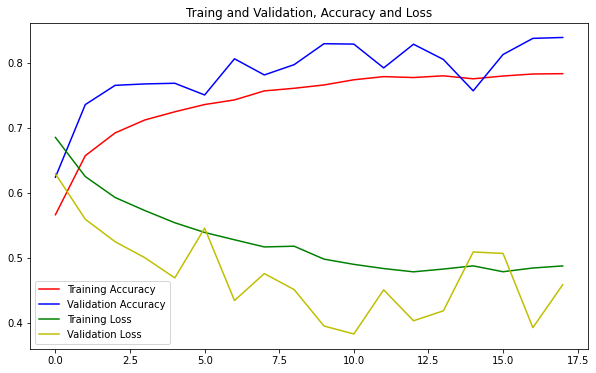

In [8]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.figure(figsize=(10, 6))
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'y', label='Validation Loss')

plt.title('Traing and Validation, Accuracy and Loss')
plt.legend(loc=0)
plt.show()